In [104]:
import os
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt



# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [105]:
#Load Train Dataset
train = pd.read_csv("Train_data.csv")
#Load Test Dataset
test=pd.read_csv("Test_data.csv")


In [106]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,normal


In [107]:
train['class'].values

array(['normal', 'normal', 'anomaly', ..., 'anomaly', 'anomaly',
       'anomaly'], dtype=object)

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [109]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [111]:
train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'attack'],
      dtype='object')

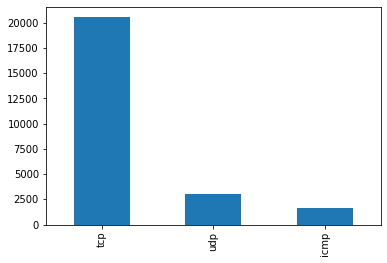

In [112]:
def bar_graph(feature):
    train[feature].value_counts().plot(kind="bar")
bar_graph('protocol_type')

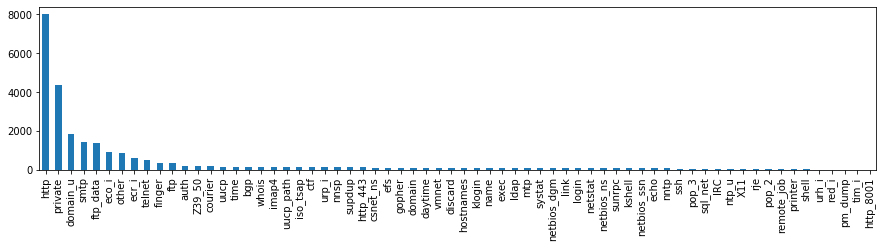

In [113]:
plt.figure(figsize=(15,3))
bar_graph('service')

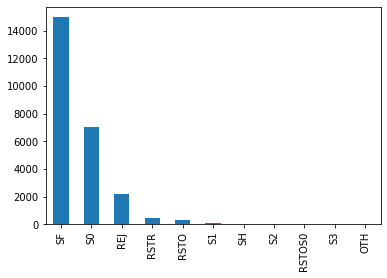

In [114]:
bar_graph('flag')

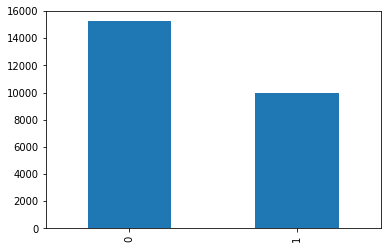

In [115]:
bar_graph('logged_in')

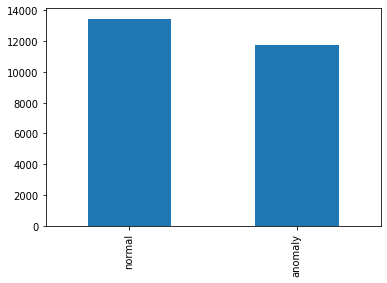

In [116]:
bar_graph('class')

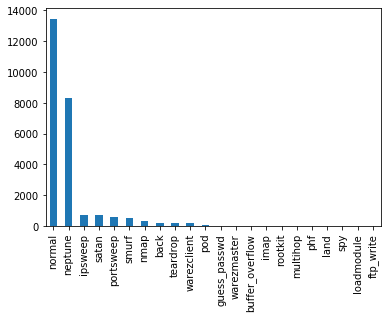

In [117]:
bar_graph('attack')

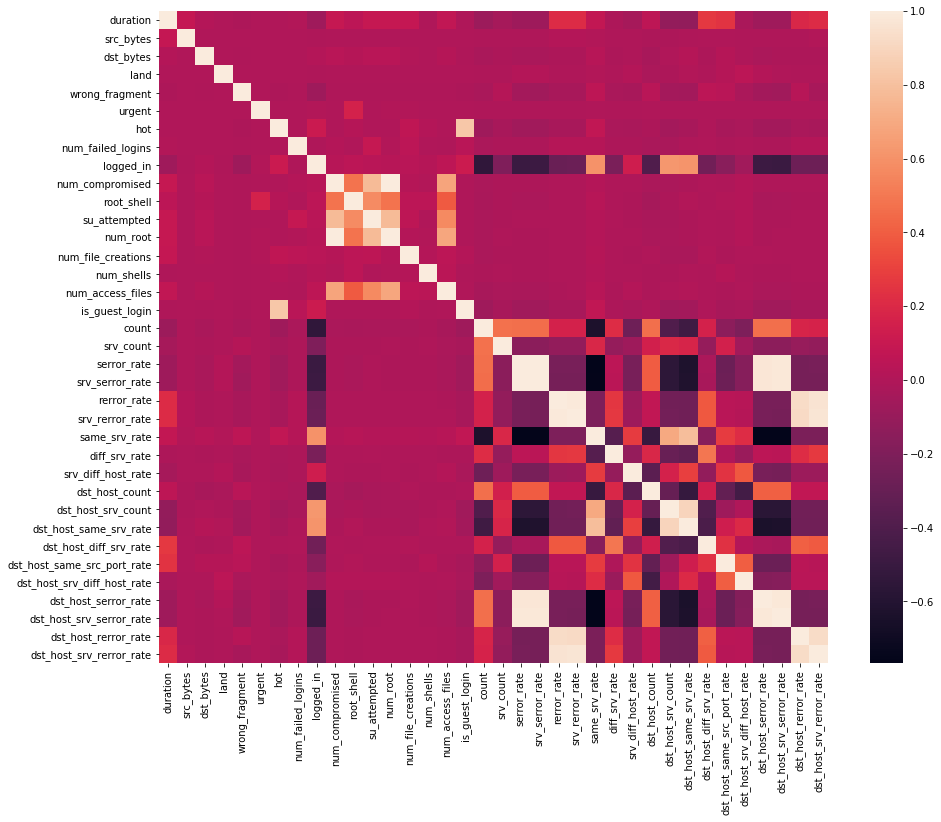

In [118]:
train=train.dropna('columns') 
train=train[[col for col in train if train[col].nunique()>1]]
corr=train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

LabelEncoder

Insert categorical features into a 2D numpy array

In [119]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

train_categorical_values = train[categorical_columns]
test_categorical_values = test[categorical_columns]

train_categorical_values.head()


,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [120]:
encoder = LabelEncoder() #create a instance of label encoder
protocol_type_t=train["protocol_type"].values
protocol_type_en=encoder.fit_transform(protocol_type_t)
train["protocol_type"]=train["protocol_type"].replace(protocol_type_t,protocol_type_en)

service_t=train["service"].values
service_en=encoder.fit_transform(service_t)
train["service"]=train["service"].replace(service_t,service_en)

flag_t=train["flag"].values
flag_en=encoder.fit_transform(flag_t)
train["flag"]=train["flag"].replace(flag_t,flag_en)


In [121]:

class_d=train["class"].values
class_en=encoder.fit_transform(class_d)
train["class"]=train["class"].replace(class_d,class_en)



In [122]:
x=train[["protocol_type", "service", "flag",  "num_failed_logins",
                                    "logged_in","num_access_files","count","srv_count","serror_rate","rerror_rate"]]
y=train["class"]

In [123]:
print(x)
print(y)

       protocol_type  service  flag  num_failed_logins  logged_in  \
0                  1       19     9                  0          0   
1                  2       41     9                  0          0   
2                  1       46     5                  0          0   
3                  1       22     9                  0          1   
4                  1       22     9                  0          1   
...              ...      ...   ...                ...        ...   
25187              1       16     2                  0          0   
25188              1       19     9                  0          1   
25189              1       46     1                  0          0   
25190              1       38     5                  0          0   
25191              1       17     5                  0          0   

       num_access_files  count  srv_count  serror_rate  rerror_rate  
0                     0      2          2          0.0          0.0  
1                     0     13 

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [125]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(17634, 10)
(7558, 10)
(7558,)
(17634,)


In [126]:
from sklearn import svm
clf=svm.SVC(gamma=0.001,C=100)
clf.fit(x_train, y_train)

SVC(C=100, gamma=0.001)

In [127]:
y_pred=clf.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred,normalize=True)
print("Accuracy Score: {}".format(score))

Accuracy Score: 0.9679809473405663


In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3319,  188],
       [  54, 3997]], dtype=int64)

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      3507
           1       0.96      0.99      0.97      4051

    accuracy                           0.97      7558
   macro avg       0.97      0.97      0.97      7558
weighted avg       0.97      0.97      0.97      7558



In [131]:
fit = clf.score(x_test, y_test)
print("R-squared:", fit) 

R-squared: 0.9679809473405663


In [132]:
a = pd.DataFrame(y_test)
a['pred']= clf.predict(x_test)
print(a.head())


       class  pred
20766      0     0
8733       1     1
6975       0     0
10356      1     1
1339       1     1


In [133]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [134]:

# Apply attack class mappings to the dataset
train['attack_class'] = train['attack'].apply(lambda v: mapping[v])
test['attack_class'] = test['attack'].apply(lambda v: mapping[v])


In [135]:
# Drop attack field from both train and test data

train.drop(['attack'], axis=1, inplace=True)
test.drop(['attack'], axis=1, inplace=True)

In [136]:

# View top 3 train data 
train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,attack_class
0,0,1,19,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,1,Normal
1,0,2,41,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,1,Normal
2,0,1,46,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,0,DoS


In [137]:

# Attack Class Distribution
attack_class_freq_train = train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,13449,53.39,9711,43.08
DoS,9234,36.65,7457,33.08
Probe,2289,9.09,2422,10.74
R2L,209,0.83,2754,12.22
U2R,11,0.04,200,0.89


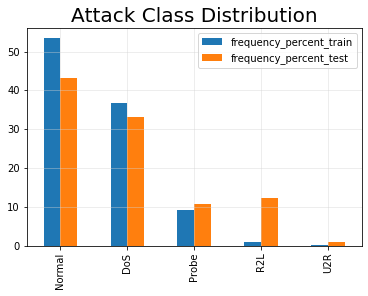

In [138]:

# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

In [152]:
import pickle

#pickle module is used for serializing and de-serializing a Python object structure. 
#Any object in Python can be pickled so that it can be saved on disk. 
#What pickle does is that it “serializes” the object first before writing it to file. 
#Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 
#The idea is that this character stream contains all the information necessary to reconstruct the object in another python scrip'''

In [153]:
pickle.dump(clf, open('model.pkl','wb'))

In [154]:
model=pickle.load(open('model.pkl','rb'))

In [155]:
print(model.predict([[1,22,9,0,1,0,30,32,0.0,0.0]])

SyntaxError: unexpected EOF while parsing (<ipython-input-155-0122e4452df1>, line 1)